In [90]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import itertools
import numpy as np

<h3><span style="color:blue">The GIFs were not showing when I convert the file to pdf. Hence the GIFS are uploaded alongside the code and can be opened.</span>.

In [91]:
class Perceptron:  
    def fit(self, X, y, n_iter=10):  # Fit the perceptron to the training data
        n_samples = X.shape[0]  # Get the number of samples in X
        n_features = X.shape[1]  # Get the number of features in X
        self.weights = np.zeros((n_features+1,))  # Initialize the weights to 0
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)  # Add a column of 1s to X
        for _ in range(n_iter):  # Loop for the specified number of iterations
            for j in range(n_samples):  # Loop over all samples
                if y[j]*np.dot(self.weights, X[j, :]) <= 0:  # If the sample is misclassified
                    self.weights += y[j]*X[j, :]  # Update the weights
                    
    def predict(self, X):  # Predict the labels for the input features
        n_samples = X.shape[0]  # Get the number of samples in X
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)  # Add a column of 1s to X
        y = np.matmul(X, self.weights)  # Compute the dot product between X and the weights
        y = np.vectorize(lambda val: 1 if val > 0 else -1)(y)  # Convert the output to 1 or -1
        return y  # Return the predicted labels
    
    def score(self, X, y):  # Calculate the mean accuracy of the model on the input data
        pred_y = self.predict(X)  # Predict the labels for the input features
        return np.mean(y == pred_y)  # Return the mean of the correct predictions


In [92]:
def polynomial_features(X: np.ndarray, p: int) -> np.ndarray:  # Generate polynomial features for the input data
    n, d = X.shape  # Get the number of samples and features in X
    features = []  # Initialize a list to store the generated features
    for i in range(1, p+1):  # Loop over the degrees from 1 to p
        for indices in itertools.combinations_with_replacement(range(d), i):  # Generate all combinations of feature indices with replacement
            x = np.ones((n,))  # Initialize the polynomial feature to 1
            for idx in indices:  # Loop over the indices
                x = x * X[:, idx]  # Multiply the polynomial feature by the corresponding feature in X
            features.append(x)  # Add the polynomial feature to the list
    return np.stack(features, axis=1)  # Stack the features in a single array and return them

def plot_data_points(ax, X, y):  # Plot the data points in a 2D scatter plot
    ax.scatter(X[:, 0], X[:, 1], c=['blue' if yi == -1 else 'red' for yi in y])  # Color the points according to their labels

def plot_decision_boundary(ax, clf, X, p):  # Plot the decision boundary of the classifier on the input data
    x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])  # Get the minimum and maximum values of the first feature
    y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])  # Get the minimum and maximum values of the second feature
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))  # Generate a grid of points in the feature space
    Z = clf.predict(polynomial_features(np.c_[xx.ravel(), yy.ravel()], p))  # Predict the labels for the points in the grid
    Z = Z.reshape(xx.shape)  # Reshape the labels to the shape of the grid
    ax.contour(xx, yy, Z, levels=[0])  # Plot the decision boundary as a contour at level 0


In [93]:
parent_dir = "/Users/farjad.ahmed/Documents/Studies/ML Lab/Exercise_07/Exercise_07/output/"

In [94]:
def anim_fig(weights, X, y, X_train, y_train, X_test, y_test, out_folder, p, n_iter, i, j, n_samples, iteration_level):
    # Create Perceptron classifier
    clf = Perceptron()
    # Set weights of the classifier
    clf.weights = weights
    # Clear current figure
    plt.clf()
    # Create subplots for train and test sets
    fig, (ax_train, ax_test) = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(16,6))
    # Plot train set
    if iteration_level:
        plot_data_points(ax_train, X_train, y_train)
    else:
        # Create a mask to plot all points except the current one
        mask = np.ones((n_samples,), dtype=bool)
        mask[j] = False
        plot_data_points(ax_train, X_train[mask, :], y_train[mask])
        # Plot current point in lime color
        ax_train.scatter(X_train[j, 0], X_train[j, 1], c='lime')
    # Plot test set
    plot_data_points(ax_test, X_test, y_test)
    # Plot decision boundaries for train and test sets
    plot_decision_boundary(ax_train, clf, X, p)
    plot_decision_boundary(ax_test, clf, X, p)
    # Set titles for train and test sets
    ax_train.set_title('Train')
    ax_test.set_title('Test')
    # Set figure title
    if iteration_level:
        fig.suptitle(f'Iteration: {i+1}/{n_iter}', fontsize=14)
    else:
        fig.suptitle(f'Iteration: {i+1}/{n_iter}; Point: {j+1}/{n_samples}', fontsize=14)
    # Save figure to file
    k = i if iteration_level else i*n_samples+j
    plt.savefig(f'{out_folder}/frame{k}.png')
    # Close figure
    plt.close(fig)

def perceptron_anim(X, y, X_train, y_train, X_test, y_test, out_folder, iteration_level, p=1, n_iter=100):
    # Get number of samples and features in train set
    n_samples = X_train.shape[0]
    n_features = X_train.shape[1]
    # Initialize weights to 0
    weights = np.zeros((n_features+1,))
    # Add a column of ones to the training data
    X_train = np.concatenate([X_train, np.ones((n_samples, 1))], axis=1)
    # Iterate through the number of iterations
    for i in range(n_iter):
        # Iterate through the train set
        for j in range(n_samples):
            # Update weights if current point is misclassified
            if y_train[j]*np.dot(weights, X_train[j, :]) <= 0:
                weights += y_train[j]*X_train[j, :]
            # Generate plot for current iteration/point
            if not iteration_level:
                anim_fig(weights, X, y, X_train, y_train, X_test, y_test, out_folder, p, n_iter, i, j, n_samples, iteration_level)

### 1

In [96]:
# Load data from files and store in variables X and y
X = np.load('Xlin_sep.npy')
y = np.load('ylin_sep.npy')
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
# Create an animation and save it to a file
perceptron_anim(X, y, X_train, y_train, X_test, y_test, 'output/lin_sep/anim', iteration_level=False, p=1, n_iter=3)
obj1 = Perceptron()# Create a perceptron model
obj1.fit(X_train, y_train)# Fit the model to the training data
# Print the accuracy of the model on the training and testing datasets
print("Train Accuracy: ", obj1.score(X_train, y_train))
print("Test Accuracy: ", obj1.score(X_test, y_test))

Train Accuracy:  1.0
Test Accuracy:  1.0


<Figure size 640x480 with 0 Axes>

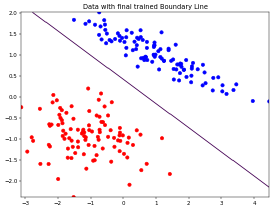

In [97]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=40, figsize=(8,6))# Create a figure and a single subplot
plot_data_points(ax, X, y)# Plot data points on the subplot
plot_decision_boundary(ax, obj1, X, 1)# Plot the decision boundary on the subplot
plt.title('Data with final trained Boundary Line')# Increase the size of the overall figure
plt.show()# Show the plot

In [98]:
import glob
from PIL import Image
def generateGIF(frame_folder):
    # Save the gif file using the first image as the base image
    # and the other images as frames
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.png")]
    frames[0].save("anim1.gif", format="GIF", append_images=frames, save_all=True, duration=100, loop=0)
# Call the generateGIF function to create the gif file
generateGIF(parent_dir+"/lin_sep/anim")
# Display the gif file using the Image function from IPython.display
from IPython.display import Image
Image(url='anim1.gif', width=700, height=300)

#### 2

In [99]:
# Load data from files and store in variables X and y
X = np.load('Xlinnoise_sep.npy')
y = np.load('ylinnoise_sep.npy')
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
# Create an animation and save it to a file
perceptron_anim(X, y, X_train, y_train, X_test, y_test, 'output/lin_noise/anim', iteration_level=True, p=1, n_iter=3)
obj2 = Perceptron()# Create a perceptron model
obj2.fit(X_train, y_train)# Fit the model to the training data
# Print the accuracy of the model on the training and testing datasets
print("Train Accuracy: ", obj2.score(X_train, y_train))
print("Test Accuracy: ", obj2.score(X_test, y_test))

Train Accuracy:  0.8266666666666667
Test Accuracy:  0.76


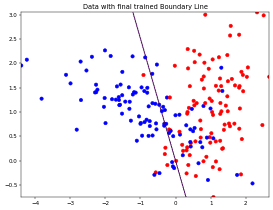

In [100]:
# Create a figure and a single subplot
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=40, figsize=(8,6))
# Plot data points on the subplot
plot_data_points(ax, X, y)
# Plot the decision boundary on the subplot
plot_decision_boundary(ax, obj2, X, 1)
plt.title('Data with final trained Boundary Line')
# Show the plot
plt.show()

In [101]:
import glob
from PIL import Image
def generateGIF(frame_folder):
    # Save the gif file using the first image as the base image
    # and the other images as frames
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.png")]
    frames[0].save("anim2.gif", format="GIF", append_images=frames, save_all=True, duration=100, loop=0)
    # Call the generateGIF function to create the gif file
generateGIF(parent_dir+"/lin_noise/anim")
# Display the gif file using the Image function from IPython.display
from IPython.display import Image
Image(url='anim2.gif', width=700, height=300)

### 3

In [102]:
# Load data from files and store in variables X and y
X = np.load('circles_x.npy')
y = np.load('circles_y.npy')
# Initiate polynomials for 2D data
X = polynomial_features(X, 2)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
# Create an animation and save it to a file
perceptron_anim(X, y, X_train, y_train, X_test, y_test, 'output/circles/anim', iteration_level=False, p=2, n_iter=3)
obj3 = Perceptron()# Create a perceptron model
obj3.fit(X_train, y_train, n_iter=3)# Fit the model to the training data
# Print the accuracy of the model on the training and testing datasets
print("Train Accuracy: ", obj3.score(X_train, y_train))
print("Test Accuracy: ", obj3.score(X_test, y_test))

/var/folders/t6/rk7lq7211555v4bhr2_wl3x00000gp/T/ipykernel_5379/4102353347.py:21: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, levels=[0])  # Plot the decision boundary as a contour at level 0


Train Accuracy:  1.0
Test Accuracy:  1.0


<Figure size 640x480 with 0 Axes>

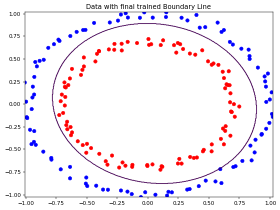

In [103]:
# Create a figure and a single subplot
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=40, figsize=(8,6))
# Plot data points on the subplot
plot_data_points(ax, X, y)
# Plot the decision boundary on the subplot
plot_decision_boundary(ax, obj3, X, 2)
plt.title('Data with final trained Boundary Line')
plt.show()

In [104]:
import glob
from PIL import Image
def generateGIF(frame_folder):
    # Save the gif file using the first image as the base image
    # and the other images as frames
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.png")]
    frames[0].save("anim3.gif", format="GIF", append_images=frames,save_all=True, duration=100, loop=0)
# Call the generateGIF function to create the gif file
generateGIF(parent_dir+"/circles/anim")
# Display the gif file using the Image function from IPython.display
from IPython.display import Image
Image(url='anim3.gif', width=700, height=300)